# Finetune Tiles

Determine the tile overlap between the finetune sets and the historical data to filter out of any pretrain dataset

In [41]:
import os
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

from shapely.geometry import Polygon

In [42]:
sns.set_style("darkgrid")

In [50]:
root = 'C:/Users/mikelaucella/Downloads'
usgs = 'C:/Users/mikelaucella/Downloads/USGS'

## Extract CIR Meta data

In [19]:
def cleanup_file(file: str) -> str:
    filename = os.path.splitext(file)[0]
    filename = filename.upper()
    return filename

In [18]:
ca_cir = pd.read_csv('E:/USGS/CIR/meta/CA.csv')
tx_cir = pd.read_csv('E:/USGS/CIR/meta/TX.csv')
df_cir = pd.concat([ca_cir, tx_cir])
df_cir.head()

,Entity ID,Agency,Vendor ID,Recording Technique,Project,Event,Roll,Frame,Acquisition Date,Scale,...,NW Corner Lat dec,NW Corner Long dec,NE Corner Lat dec,NE Corner Long dec,SE Corner Lat dec,SE Corner Long dec,SW Corner Lat dec,SW Corner Long dec,Display ID,Entity ID
0,AR61000003A0003,6,NaN,2,10000,NaN,00003A,3,1969/07/17,63763,...,36.711944,-121.95528,36.776990,-121.82528,36.672602,-121.74528,36.607222,-121.87528,AR61000003A0003,AR61000003A0003
1,AR61000003A0004,6,NaN,2,10000,NaN,00003A,4,1969/07/17,63763,...,36.771353,-121.83654,36.836306,-121.70673,36.732223,-121.62673,36.666936,-121.75654,AR61000003A0004,AR61000003A0004
2,AR61000003A0005,6,NaN,2,10000,NaN,00003A,5,1969/07/17,63763,...,36.830670,-121.71799,36.895530,-121.58836,36.791751,-121.50836,36.726558,-121.63799,AR61000003A0005,AR61000003A0005
3,AR61000003A0006,6,NaN,2,10000,NaN,00003A,6,1969/07/17,63763,...,36.889894,-121.59963,36.954661,-121.47018,36.851186,-121.39018,36.786086,-121.51963,AR61000003A0006,AR61000003A0006
4,AR61000003A0007,6,NaN,2,10000,NaN,00003A,7,1969/07/17,63763,...,36.949025,-121.48145,37.013699,-121.35219,36.910528,-121.27219,36.845521,-121.40145,AR61000003A0007,AR61000003A0007


In [ ]:
ca_cir = [cleanup_file(file) for file in os.listdir('E:/USGS/CIR/CA') if file.endswith('.tif')]
tx_cir = [cleanup_file(file) for file in os.listdir('E:/USGS/CIR/TX') if file.endswith('.tif')]
files_cir = ca_cir + tx_cir

print('CIR files found: ', len(files_cir))

CIR files found:  208


In [29]:
df_cir = df_cir[df_cir['Photo ID'].isin(set(files_cir))]

print('CIR files in metadata: ', len(df_cir))

CIR files in metadata:  208


## Extract NCIR Meta data

In [3]:
ca_ncir = pd.read_csv('E:/USGS/NCIR/meta/CA.csv', encoding="latin-1")
tx_ncir = pd.read_csv('E:/USGS/NCIR/meta/TX.csv', encoding="latin-1")
df_ncir = pd.concat([ca_ncir, tx_ncir])
df_ncir.head()

,NAIP Entity ID,State,Agency,Vendor,Map Projection,Projection Zone,Datum,Resolution,Units,Number of Bands,...,NW Corner Lat dec,NW Corner Long dec,NE Corner Lat dec,NE Corner Long dec,SE Corner Lat dec,SE Corner Long dec,SW Corner Lat dec,SW Corner Long dec,Display ID,Entity ID
0,N_3612016_NE_10_1_20050611,CA,USDA,UNKNOWN,UTM,10N,NAD83,1.0,METER,3,...,36.879450,-120.065883,36.877650,-119.993939,36.807972,-119.996669,36.809769,-120.068547,N_3612016_NE_10_1_20050611,1237514
1,N_3612013_SW_10_1_20050611,CA,USDA,UNKNOWN,UTM,10N,NAD83,1.0,METER,3,...,36.816725,-120.503397,36.815200,-120.431822,36.745767,-120.434139,36.747289,-120.505650,N_3612013_SW_10_1_20050611,1237519
2,N_3612024_SE_10_1_20050611,CA,USDA,UNKNOWN,UTM,10N,NAD83,1.0,METER,3,...,36.692014,-120.065864,36.690219,-119.993986,36.620539,-119.996694,36.622328,-120.068511,N_3612024_SE_10_1_20050611,1237522
3,N_3612007_NE_10_1_20050611,CA,USDA,UNKNOWN,UTM,10N,NAD83,1.0,METER,3,...,37.004397,-120.190855,37.002675,-120.119011,36.933080,-120.121636,36.934800,-120.193414,N_3612007_NE_10_1_20050611,1237523
4,N_3612012_NW_10_1_20050611,CA,USDA,UNKNOWN,UTM,10N,NAD83,1.0,METER,3,...,36.879128,-120.628358,36.877680,-120.556942,36.808330,-120.559150,36.809775,-120.630500,N_3612012_NW_10_1_20050611,1237529


In [ ]:
ca_ncir = [cleanup_file(file) for file in os.listdir('E:/USGS/NCIR/CA') if file.endswith('.tif')]
tx_ncir = [cleanup_file(file) for file in os.listdir('E:/USGS/NCIR/TX') if file.endswith('.tif')]
files_ncir = ca_ncir + tx_ncir

print('NCIR files found: ', len(files_ncir))

NCIR files found:  193


In [16]:
df_ncir = df_ncir[df_ncir['Display ID'].isin(set(files_ncir))]

print('NCIR files in metadata: ', len(df_ncir))

NCIR files in metadata:  193


## Build Geo Data

In [61]:
def build_geo_df(meta_df):
    coords = meta_df[[
        'NW Corner Lat dec', 'NW Corner Long dec',
        'NE Corner Lat dec', 'NE Corner Long dec',
        'SW Corner Lat dec', 'SW Corner Long dec',
        'SE Corner Lat dec', 'SE Corner Long dec'
    ]].values

    polys = [
        Polygon([
            (coords[i, 1], coords[i, 0]),
            (coords[i, 5], coords[i, 4]),
            (coords[i, 7], coords[i, 6]),
            (coords[i, 3], coords[i, 2]),
            (coords[i, 1], coords[i, 0])
        ])
        for i in range(coords.shape[0])
    ]

    return gpd.GeoDataFrame(meta_df, geometry=polys, crs='EPSG:4326')

In [62]:
gdf_cir = build_geo_df(df_cir)
gdf_ncir = build_geo_df(df_ncir)

## Visualize Overlap

In [47]:
def clean_tilename(tilename: str) -> str:
    filename = os.path.splitext(tilename)[0]
    tilename = filename.split('_')[1]
    return tilename

def load_state_shape(root: str, state: str) -> gpd.GeoDataFrame:
    tile_index = 'TILE_INDEX.shp/tile_index.shp'
    if state == 'ND' or state == 'SD':
        tile_index = 'TILE_INDEX.shp/dakota_tile_index.shp'
    if state == 'NM':
        tile_index = 'TILE_INDEX.shp/mexico_tile_index.shp'

    df = gpd.read_file(os.path.join(root, state, tile_index))
    df['state_short'] = state

    if 'state' not in df.columns:
        df['state'] = state

    if state == 'TX':
        df['id'] = df['new_id']
    if state == 'MT':
        df['id'] = df['tileName'].apply(clean_tilename)

    return df

In [ ]:
states = {
    state: load_state_shape(usgs, state)
    for state in os.listdir(usgs)
    if os.path.isdir(os.path.join(usgs, state))
}

tile_indexes = pd.concat(states.values(), ignore_index=True)

In [48]:
state_full = [ # The 17 state names in the USGS western region
    'Texas', 'Montana', 'North Dakota', 'South Dakota', 'New Mexico',
    'Oklahoma', 'Kansas', 'Nebraska', 'Wyoming', 'Colorado', 'Utah',
    'Idaho', 'Washington', 'Oregon', 'California', 'Nevada', 'Arizona'
]

st_boundaries = gpd.read_file(os.path.join(root, 'ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp'))
st_boundaries = st_boundaries[st_boundaries.name.isin(state_full)]
st_boundaries = st_boundaries[st_boundaries['iso_3166_2'] != 'BG-12']

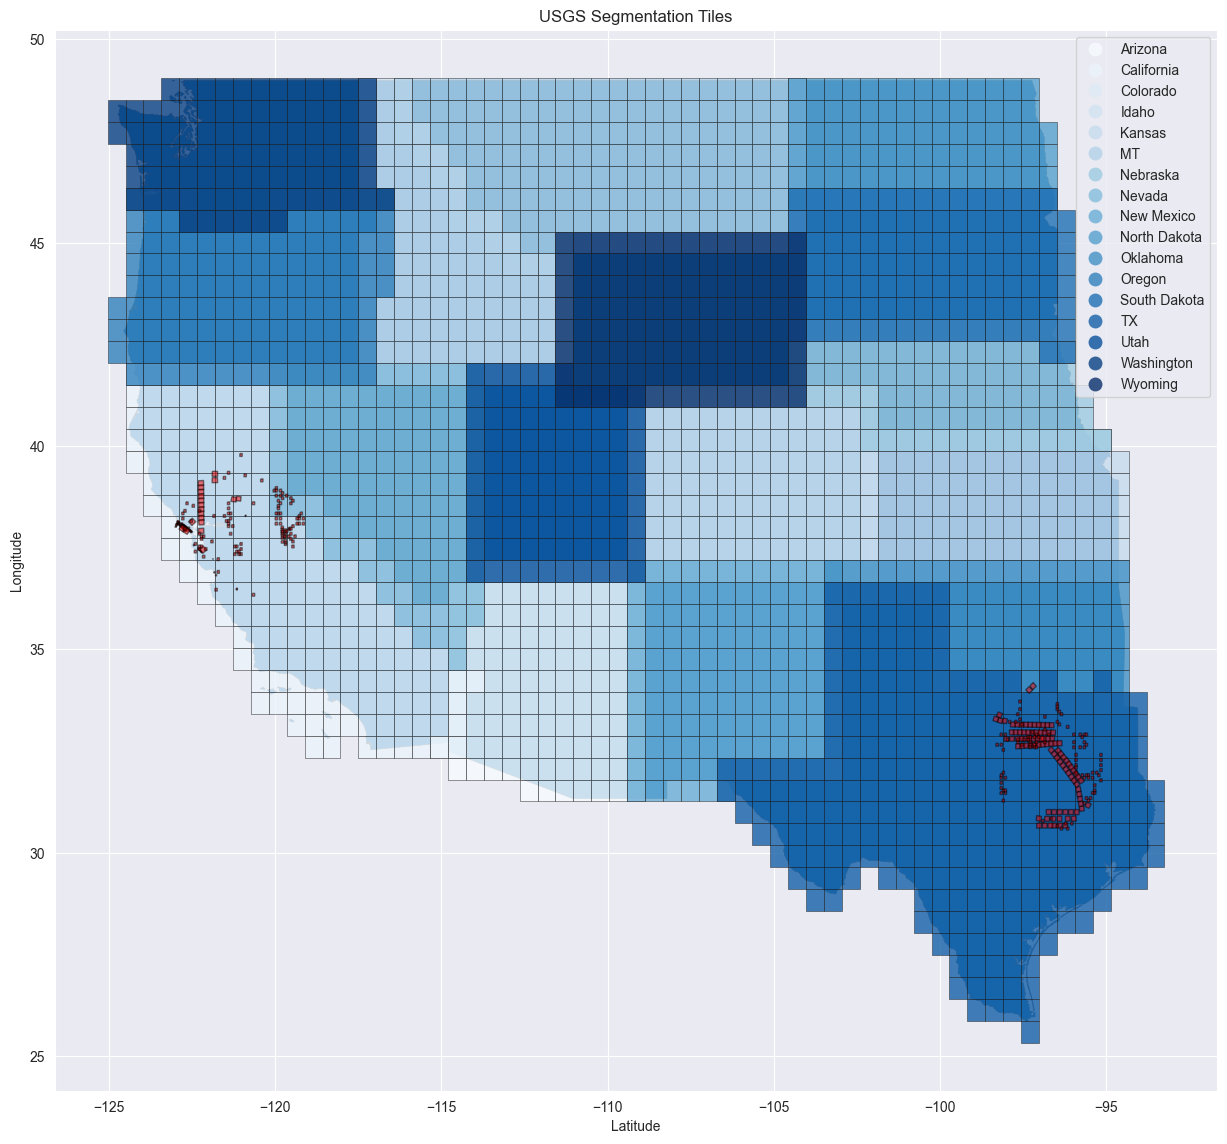

In [65]:
fig, ax = plt.subplots(figsize=(15, 15))
st_boundaries.plot(ax=ax, linewidth=0.4, edgecolor=".4")
tile_indexes.plot(column='state', cmap='Blues', ax=ax, linewidth=0.4, edgecolor=".1", alpha=0.8, legend=True)
gdf_cir.plot(ax=ax, color='red', alpha=0.5, edgecolor='black')
gdf_ncir.plot(ax=ax, color='red', alpha=0.5, edgecolor='black')
ax.set_title('USGS Segmentation Tiles')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
plt.show()

## Get Overlapping Tile Ids

In [74]:
tile_indexes['tile_id'] = tile_indexes['state_short'] + '_' + tile_indexes['id']

In [81]:
cir_tiles = list(tile_indexes[tile_indexes.intersects(gdf_cir.union_all())]['tile_id'].unique())
ncir_tiles = list(tile_indexes[tile_indexes.intersects(gdf_ncir.union_all())]['tile_id'].unique())
overlapping_tiles = set(cir_tiles + ncir_tiles)

print('Overlapping tiles: ', len(overlapping_tiles))

Overlapping tiles:  82


In [82]:
overlapping_tiles

{'CA_R05C05',
 'CA_R05C06',
 'CA_R05C07',
 'CA_R06C05',
 'CA_R06C06',
 'CA_R06C07',
 'CA_R06C08',
 'CA_R06C09',
 'CA_R07C04',
 'CA_R07C05',
 'CA_R07C06',
 'CA_R07C07',
 'CA_R07C08',
 'CA_R07C09',
 'CA_R07C10',
 'CA_R08C03',
 'CA_R08C04',
 'CA_R08C05',
 'CA_R08C06',
 'CA_R08C07',
 'CA_R08C08',
 'CA_R08C09',
 'CA_R08C10',
 'CA_R09C04',
 'CA_R09C05',
 'CA_R09C06',
 'CA_R09C07',
 'CA_R09C09',
 'CA_R09C10',
 'CA_R10C05',
 'CA_R10C06',
 'CA_R11C05',
 'CA_R11C06',
 'CA_R11C07',
 'CA_R11C08',
 'NV_R06C01',
 'NV_R06C02',
 'NV_R07C01',
 'NV_R07C02',
 'OK_R06C12',
 'OK_R07C11',
 'OK_R07C12',
 'OK_R07C13',
 'OK_R07C14',
 'TX_R06C16',
 'TX_R06C17',
 'TX_R06C18',
 'TX_R06C19',
 'TX_R06C20',
 'TX_R07C16',
 'TX_R07C17',
 'TX_R07C18',
 'TX_R07C19',
 'TX_R07C20',
 'TX_R07C21',
 'TX_R08C16',
 'TX_R08C17',
 'TX_R08C18',
 'TX_R08C19',
 'TX_R08C20',
 'TX_R08C21',
 'TX_R08C22',
 'TX_R09C16',
 'TX_R09C17',
 'TX_R09C19',
 'TX_R09C20',
 'TX_R09C21',
 'TX_R09C22',
 'TX_R10C16',
 'TX_R10C17',
 'TX_R10C20',
 'TX_R